# <span style="color:orange;">**Three or Seven Digit Classifier**</span>

First of all, I should import all necessary libraries:

In [1]:
from fastai.vision.all import *
from utils import *
from fastbook import *

In the next line, I download a sample of MNIST that contains images of just these digits:

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In the next line, I show what is there in this directory:

In [3]:
path.ls()

(#3) [Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/labels.csv'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/valid')]

As the downloaded data set seprated by three data sets called "training set", "validation set" and "test set", in the next line, I show what is there in the training set:

In [4]:
(path/'train').ls()

(#2) [Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/3'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/7')]

As you could see, there is a folder called 3 for 3 digit pictures and another one for 7 digit pictures.

In the next line, I show what is there in each folder (I sort to get the same order files):

In [5]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [6]:
threes

(#6131) [Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/3/10.png'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/3/10000.png'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/3/10011.png'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/3/10031.png'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/3/10034.png'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/3/10042.png'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/3/10052.png'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/3/1007.png'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/3/10074.png'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/3/10091.png')...]

In [7]:
sevens

(#6265) [Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/7/10002.png'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/7/1001.png'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/7/10014.png'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/7/10019.png'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/7/10039.png'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/7/10046.png'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/7/10050.png'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/7/10063.png'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/7/10077.png'),Path('C:/Users/Nafis Rayaneh/.fastai/data/mnist_sample/train/7/10086.png')...]

As it is seen, there are a lot of pictures of 3 and 7 in the mentioned folder.

In the next lines, I want show one of the pictures of 3 and 7:

In [8]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [9]:
im7_path = sevens[1]
im7 = Image.open(im7_path)
im7

In the next line, as the computer just understand the number, these images should convert into the numpy array or PyTorch tensor as follows (I request the numbers from 4th index in rows - inclusive - to 10th index in rows - noninclusive - and the same reason for columns):

↓ Numpy array ↓

In [10]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [11]:
array(im7)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   9],
       [  0,   0,   0,   0,   0, 169]], dtype=uint8)

↓ PyTorch Tensor ↓

In [12]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [13]:
tensor(im7)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   9],
        [  0,   0,   0,   0,   0, 169]], dtype=torch.uint8)

In the next lines, I can slice the array to pick just the part with the top of the digit in it, and then use a Pandas DataFrame to color-code the values using a gradient, which shows clearly how the image is created from the pixel values for both 3 picture and 7:

In [14]:
im3_t = tensor(im3)
df_3 = pd.DataFrame(im3_t[4:26, 4:22])
df_3.style.set_properties(**{'font-siz': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [15]:
im7_t = tensor(im7)
df_7 = pd.DataFrame(im7_t[4:27, 4:26])
df_7.style.set_properties(**{'font-siz': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,13,7,0,0,0,0,0,0,2,93,244,207,8,0
3,0,0,0,0,0,0,15,157,254,197,0,0,0,0,0,18,131,254,254,248,11,0
4,0,0,0,0,0,9,220,254,254,230,104,0,0,0,65,216,254,254,254,218,8,0
5,0,0,0,0,0,169,254,254,231,126,40,11,70,180,254,254,254,254,254,90,0,0
6,0,0,0,40,183,251,254,226,81,70,180,229,254,254,254,254,254,254,115,3,0,0
7,0,0,7,208,254,254,255,254,254,254,255,254,254,254,254,254,254,190,3,0,0,0
8,0,0,53,254,254,254,254,254,253,250,212,169,125,167,254,254,241,35,0,0,0,0
9,0,0,150,254,254,181,77,77,48,0,0,0,128,254,254,253,57,0,0,0,0,0


Notice: As it is seen, the background white pixels are sotred as the number 0, black is the number 255, and shades of gray are between the two. The entire images contains 28 pixels across and 28 pixels down, for a total of 768 pixels.

In the next line, I get all the 3s and 7s pictures into a tensor:

In [16]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

In the next line, I show the first element of the `three_tensors` and the `seven_tensors`:

<AxesSubplot:>

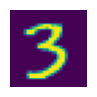

In [17]:
show_image(three_tensors[1])

<AxesSubplot:>

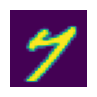

In [18]:
show_image(seven_tensors[1])

As I want to compute the average over all the images of the intensity of that pixel, I should combine all the images in this list into a single three-dimensional tensor. To do this, I use the `stack` function from PyTorch library as follows (Since some of PyTorch operation needs types to be changed, I should cast the pixel numbers to float as follows):

In [19]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

In [20]:
stacked_sevens.shape

torch.Size([6265, 28, 28])

In [21]:
stacked_threes.shape

torch.Size([6131, 28, 28])

The `shape` attribute returns three axis as follows:
1. First axis: Number of images
1. Second axis: Height
1. Third axis: Width

In the next line, I show the rank of the tensors:

In [22]:
len(stacked_threes.shape)

3

In [23]:
len(stacked_sevens.shape)

3

Notice:
- rank: It is the number of axes or dimensions in a tensor
- shape: It is the size of each axis of a tensor

In the next line, I get the rank of the tensors in another way:

In [24]:
stacked_threes.ndim

3

In [25]:
stacked_sevens.ndim

3

Finally, I can compute what the ideal 3 looks like. I calculate the mean of all the image tenosrs by taking the mean along dimension 0 our stacked, rank-3 tensor. This is the dimension that indexes over all the images. In other words, for every pixel position, this will compute the average of that pixel over all images. The result will be one value for every pixel position, or a single image. The result is as follows:

In [26]:
mean7 = stacked_sevens.mean(0)
mean3 = stacked_threes.mean(0)

<AxesSubplot:>

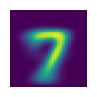

In [27]:
show_image(mean7)

<AxesSubplot:>

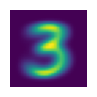

In [28]:
show_image(mean3)

In the next line, I show the arbitary image from stacked converted tenosrs:

In [29]:
a_7 = stacked_sevens[1]
a_3 = stacked_threes[1]

<AxesSubplot:>

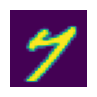

In [30]:
show_image(a_7)

<AxesSubplot:>

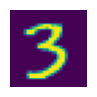

In [31]:
show_image(a_3)

Let's talk about how the differences between these images and our ideal digit are calculated. For this purpose, I can't just add up the differences between the pixels of this image and the ideal digit. Because it may cause that whether the image is too dark or too light, it returns no differences. So alternatively I could calculate the norm 1 - mean absolute - or norm 2 - root mean square error. This process is done as follows:

In [32]:
# For 3 image
dist_3_abs = (a_3 - mean3).abs().mean() # Mean absolute
dist_3_sqr = ((a_3 - mean3) ** 2).mean().sqrt() # Root mean square error

In [33]:
# For 7 image
dist_7_abs = (a_7 - mean7).abs().mean() # Mean absolute
dist_7_sqr = ((a_7 - mean7) ** 2).mean().sqrt() # Root mean square error

In [34]:
print("Mean absolute for 3 image: ", dist_3_abs, "And Root mean square error for 3 image: ", dist_3_sqr)

Mean absolute for 3 image:  tensor(0.1114) And Root mean square error for 3 image:  tensor(0.2021)


In [35]:
print("Mean absolute for 7 image: ", dist_7_abs, "And Root mean square error for 7 image: ", dist_7_sqr)

Mean absolute for 7 image:  tensor(0.1304) And Root mean square error for 7 image:  tensor(0.2585)


In the next line, I use the PyTorch and its *loss function*:

In [36]:
F.l1_loss(a_3.float(), mean3), F.mse_loss(a_3, mean3).sqrt()

(tensor(0.1114), tensor(0.2021))

In [37]:
F.l1_loss(a_7.float(), mean7), F.mse_loss(a_7, mean7).sqrt()

(tensor(0.1304), tensor(0.2585))

In the next lines, I want to calculate the metrics - that tell us how good our model is - instead of just calculating the mean square error and the mean absolute error that are not sensible to most of the poeple.

In [38]:
# For number 3
valid_3_tensors = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tensors = valid_3_tensors.float()/255

# For number 7
valid_7_tensors = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tensors = valid_7_tensors.float()/255

In [39]:
valid_3_tensors.shape

torch.Size([1010, 28, 28])

In [40]:
valid_7_tensors.shape

torch.Size([1028, 28, 28])

In the next lines, I want to write a function that calculates the mean absolute error to tell what is the distance betweent the arbitrary image and the ideal digit:

In [41]:
def mnist_distance(a, b):
    return (a - b).abs().mean((-1, -2))

In the next line, I got the same exact result of checking the how far the ideal digit that is mean3 and the arbitrary image - a_3.

In [42]:
mnist_distance(a_3, mean3)

tensor(0.1114)

In the next line, I pass the `valid_3_tensors` to the mnist to get the mean absolute error on all of images:

In [43]:
print("The validation shape: ", valid_3_tensors.shape, "The ideal digit size: ", mean3.shape)

The validation shape:  torch.Size([1010, 28, 28]) The ideal digit size:  torch.Size([28, 28])


In [44]:
# For number 3 tensors
valid_3_distance = mnist_distance(valid_3_tensors, mean3)

# For number 7 tensors
valid_7_distance = mnist_distance(valid_7_tensors, mean7)

In [45]:
valid_3_distance

tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260])

In [46]:
valid_3_distance.shape

torch.Size([1010])

In [47]:
valid_7_distance

tensor([0.0874, 0.0971, 0.1050,  ..., 0.0893, 0.0983, 0.0977])

In [48]:
valid_7_distance.shape

torch.Size([1028])

In the next line, I can use the `mnist_distance` to figure out whether an image is a 3 by using the following logic: If the distance between the digit in question and the ideal is less than the distance to the ideal 7, then it's a 3. This function will automatically do broadcasting - do a simple operation over all elements of a tensor - and be applied elementwise, just like all PyTorch functions and operators:

In [49]:
def is_3(desired_number, ideal_3_digit, ideal_7_digit):
    return mnist_distance(desired_number, ideal_3_digit) < mnist_distance(desired_number, ideal_7_digit)

In the next line, let's check on our example case that is `a_3':

In [50]:
is_3(a_3, mean3, mean7)

tensor(True)

In [51]:
is_3(a_3, mean3, mean7).float()

tensor(1.)

Thanks to broadcasting, I can also test it on the full validation set of 3s and 7s as well:

In [52]:
is_3(valid_3_tensors, mean3, mean7)

tensor([ True,  True,  True,  ..., False,  True,  True])

In [53]:
is_3(valid_7_tensors, mean3, mean7)

tensor([False, False, False,  ..., False, False, False])

Now I can calculate the accuracy for each of the 3s and 7s, by taking the average of that function for all 3s and its inverse for all 7s:

In [54]:
accuracy_3s =      is_3(valid_3_tensors, mean3, mean7).float().mean()
accuracy_7s = (1 - is_3(valid_7_tensors, mean3, mean7).float()).mean()

In [55]:
accuracy_3s

tensor(0.9168)

In [56]:
accuracy_7s

tensor(0.9854)

In [57]:
(accuracy_3s + accuracy_7s)/2

tensor(0.9511)

As it is seen, the accuracy for detecting the 3 and 7 is more 90%. It is good, but enough!

## <span style="color:orange">**Stochastic Gradient Descent**</span>

In the next lines, I want to allow myself to have a model that can get better and better - that can learn. But my pixel similarity approach does not really do this. Instead of trying to find the similarity between an image and an "ideal image", I could insead look at each individual pixel and come up with a set of weights for each, such that the highest weights are associated with those pixels most likely to be black for a particular category. For instance, pixels toward the bottom right are not very likely to be activated for a 7, so they should have a low weight for a 7, but they are likely to be activated for an 8, so they should have a high weight for an 8. To be more specific, here the steps required to turn this function¹:
```
def pridict_eight(x, w):
    (x * w).sum()
```
into a machine learning classifier:
1. **Initialize** the weights
2. For each image, use these weights to **predict** whether it appears to be a 3 or a 7.
3. Based on these predictions, calculate how good the model is (its **loss**).
4. Calculate the **gradient**, which measures for each weight how changing that weight would change the loss.
5. **Step** (that is, change) all the weights based on that calculation.
6. Go back to step 2 and **repeat** the process.
7. Iterate until you decide to **stop** the training process (for instance, because the model is good enough or you don't want to wait any longer).
---
¹ To explain more about this function: I am assuming that `x` is the image, represented as a vector - in other words, with all of the rows stacked up end to end into a single long line. And I am assuming that the weights are a vector `w`. If I have this function, I just need some way to update the weights to make them a little bit better. With such an approach, I can repeat that step a number of times, making the weights better and better, until they are as good as I can make them.

# <span style="color:orange">**Learning Session:**</span>

In the next bloc, I defined the plot_function to plot the function itself.

In [58]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max, 100)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

In the next bloc, I defined a quadratic function to use the `plot_function` to plot it.

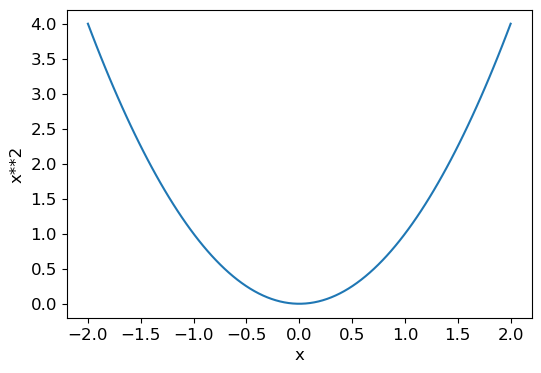

In [59]:
def f(x):
    return x**2

plot_function(f, 'x', 'x**2')

In the next bloc, I use the `plot_function` to plot the quadratic function and a point on it.

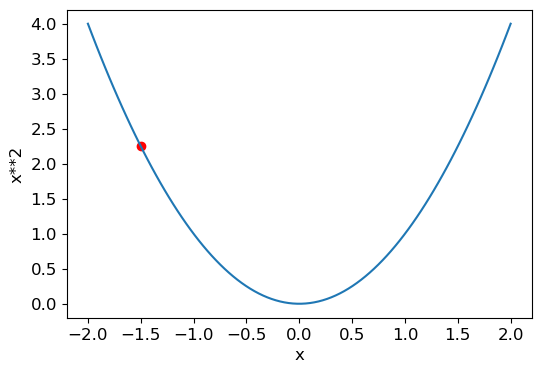

In [60]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')

In the next bloc, I pick a tensor value at which I want calculate the gradient:

In [61]:
xt = tensor(3.).requires_grad_()

In the next bloc, I calculate my function with that value:

In [62]:
yt = f(xt)
print("The y(x) is ", yt)

The y(x) is  tensor(9., grad_fn=<PowBackward0>)


In the next bloc, finally I tell PyTorch to calculate the gradients for me:

In [63]:
yt.backward()

In the next bloc, I can now view the gradients by checking the grad attribute of my tensor:

In [64]:
xt.grad

tensor(6.)

In the next bloc, I try the same procedure for a vecor argument:

In [65]:
xt1 = tensor([3., 4., 10.]).requires_grad_()
xt1

tensor([ 3.,  4., 10.], requires_grad=True)

In the next bloc, I wnat add sum to my function so it can take a vector (i.e., a rank-1 tensor) and return a scaler (i.e., a rank-0 tensor):

In [66]:
def f1(x):
    return (x**2).sum()

yt2 = f1(xt1)
yt2

tensor(125., grad_fn=<SumBackward0>)

In the next bloc, I calculate the gradients and the results are as I expect:

In [67]:
yt2.backward()

In [68]:
xt1.grad

tensor([ 6.,  8., 20.])

Now it's time to look at an SGD example and see how finding a minimum can be used to train a model to fit data better. In the next lines, I do this:

Imagine you were measuring the speed of a roller coaster as it went over the top of a hump. It would start fast, and then get slower as it went up the hill; it would be slowest at the top, and it would then speed up again as it went downhill. I want to build a model of how the speed changes over time.

In [69]:
time = torch.arange(0, 20).float();
print(time)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])


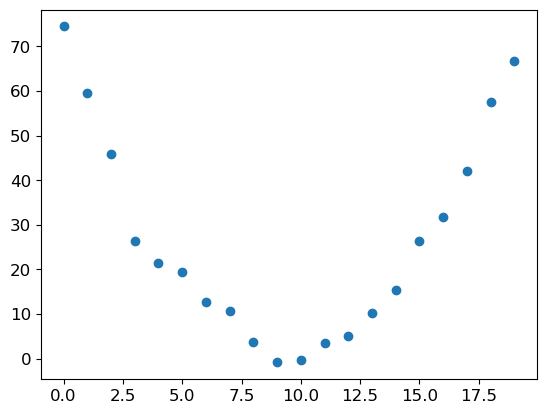

In [71]:
speed = torch.randn(20) * 3 + 0.75 * (time - 9.5)**2 + 1
plt.scatter(time, speed)

Le's guess a quadratic function for this data set:

In [72]:
def f_training_quadratic_guess(t, params):
    a, b, c = params
    return a*(t**2) + (b*t) + c

In the next line, I defined a mean square error function to see which weights or finding the quadratic parameters or constants are better:

In [73]:
def mse(preds, targets):
    return ((preds - targets)**2).mean()

In the next lines, let's work through the seven-step process:

**Step 1: Initialize the parameters**

First, I initialize the parameters to random values and tell PyTorch that we want to track their gradients using `requires_grad_`:

In [76]:
params = torch.randn(3).requires_grad_()
print(params)

tensor([0.2815, 0.0562, 0.5227], requires_grad=True)


**Step 2: Calculate the predictions**

Next, I calculate the predictions:

In [78]:
preds = f_training_quadratic_guess(time, params)
preds

tensor([  0.5227,   0.8604,   1.7611,   3.2249,   5.2517,   7.8415,  10.9944,  14.7103,  18.9893,  23.8313,  29.2363,  35.2044,  41.7355,  48.8296,  56.4868,  64.7071,  73.4903,  82.8366,  92.7460,
        103.2184], grad_fn=<AddBackward0>)

In the next line, let's create a little function to see how close my predictions are to my targets, and take a look:

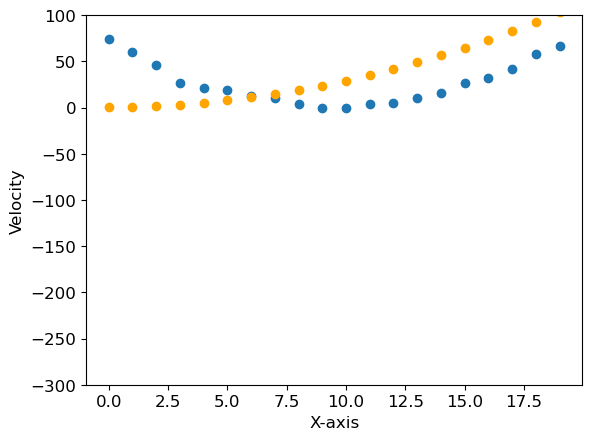

In [83]:
def show_preds(preds, ax=None):
    if ax is None:
        ax = plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color="orange")
    ax.set_ylim(-300, 100)
    plt.ylabel("Velocity")
    plt.xlabel("X-axis")
    
show_preds(preds)

**Step 3: Calculate the loss**

I calculate the loss as follows:

In [84]:
loss = mse(preds, speed)
loss

tensor(1325.5891, grad_fn=<MeanBackward0>)

**Step 4: Calculate the gradients**

The next step is to calculate the gradients, or an approximation of how the parameters need to change:

In [85]:
loss.backward()
params.grad

tensor([8442.9541,  544.7577,   18.4759])

In [86]:
params.grad*1e-4

tensor([0.8443, 0.0545, 0.0018])

I can use these gradients to improve my parameters. I will need to pick a learning rate (I will discuss how to do that in practice in the next chapter; for now I will just use `1e-4`):

In [93]:
params

tensor([-0.5628,  0.0017,  0.5209], requires_grad=True)

**Step 5: Step the weights**

Now, I need to update the parameters based on the gradients I just calculated:

In [98]:
lr = 1e-4 # The learning rate
params.data = params.data - lr * params.grad.data
params.grad = None

tensor([-0.5628,  0.0017,  0.5209], requires_grad=True)

Let's see if the loss has imporved:

In [99]:
preds = f_training_quadratic_guess(time, params)
preds

tensor([ 5.2087e-01, -4.0220e-02, -1.7269e+00, -4.5391e+00, -8.4768e+00, -1.3540e+01, -1.9729e+01, -2.7043e+01, -3.5483e+01, -4.5049e+01, -5.5740e+01, -6.7556e+01, -8.0499e+01, -9.4566e+01,
        -1.0976e+02, -1.2608e+02, -1.4352e+02, -1.6209e+02, -1.8179e+02, -2.0261e+02], grad_fn=<AddBackward0>)

In [100]:
mse(preds, speed)

tensor(14388.7158, grad_fn=<MeanBackward0>)

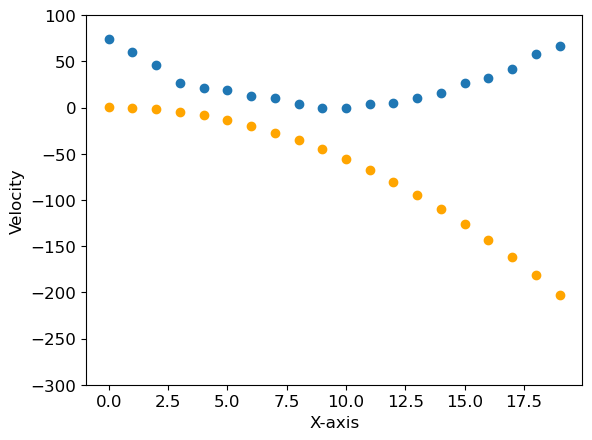

In [101]:
show_preds(preds)

I need to repeat this a few times, so I will create a function to apply one step:

In [102]:
def apply_step(params, prn=True):
    preds = f_training_quadratic_guess(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data = params.data - lr * params.grad.data
    params.grad = None
    if prn:
        print(loss.item())
    return preds

**Step 6: Repeat the process**

Now I iterate. By looping and performing many improvements, I hope to reach a good result:

In [106]:
lr = 1e-5 # Chaning the learning rate to 1e-5
for i in range(10):
    apply_step(params)

1751.866455078125
892.3031005859375
729.6446533203125
698.8618774414062
693.0339965820312
691.9283447265625
691.716064453125
691.673095703125
691.662109375
691.6571655273438


Let's see the results visually:

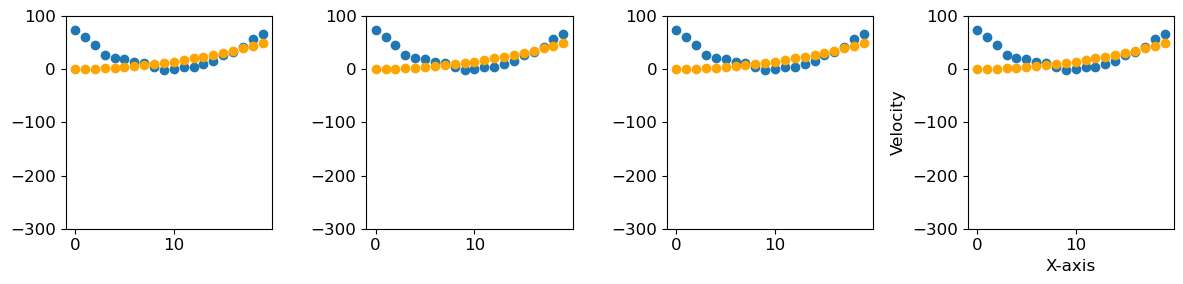

In [110]:
_, axs = plt.subplots(1, 4, figsize=(12, 3))
for ax in axs:
    show_preds(apply_step(params, False), ax)
plt.tight_layout()